In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Importing data from desktop

Data_DIR = '/content/drive/MyDrive/Major Project - Shivam Rawat/Flowers Image Dataset'
LABEL = ['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
training_data = []
target = []

for label in LABEL:
  flower_type = LABEL.index(label)       
  path = os.path.join(Data_DIR,label)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    img_resized = cv2.resize(img_array,(150,150))
    training_data.append(img_resized)
    target.append(flower_type)

In [ ]:
training_data = np.array(training_data)
target = np.array(target)

In [ ]:
print(len(training_data))

4235


In [ ]:
# Splitting data into train & test data

x_train,x_test,y_train,y_test = train_test_split(training_data,target,test_size=0.3,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2964, 150, 150, 3)
(1271, 150, 150, 3)
(2964,)
(1271,)


In [ ]:
# Using Transfer Learning for Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train[0].shape)
for layer in base_model.layers:
  base_model.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(5,activation='softmax')(x)

model = Model(inputs = base_model.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32) 

Epoch 1/10
75/75 [==============================] - 632s 8s/step - loss: 0.8873 - accuracy: 0.6740 - val_loss: 0.6439 - val_accuracy: 0.7572
Epoch 2/10
75/75 [==============================] - 634s 8s/step - loss: 0.4049 - accuracy: 0.8579 - val_loss: 0.5757 - val_accuracy: 0.7960
Epoch 3/10
75/75 [==============================] - 634s 8s/step - loss: 0.2618 - accuracy: 0.9081 - val_loss: 0.5848 - val_accuracy: 0.8162
Epoch 4/10
75/75 [==============================] - 633s 8s/step - loss: 0.1544 - accuracy: 0.9477 - val_loss: 0.6290 - val_accuracy: 0.8145
Epoch 5/10
75/75 [==============================] - 634s 8s/step - loss: 0.0787 - accuracy: 0.9713 - val_loss: 0.6560 - val_accuracy: 0.8128
Epoch 6/10
75/75 [==============================] - 634s 8s/step - loss: 0.0594 - accuracy: 0.9793 - val_loss: 0.7923 - val_accuracy: 0.8111
Epoch 7/10
75/75 [==============================] - 635s 8s/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 1.2391 - val_accuracy: 0.7538
Epoch 8/10
75

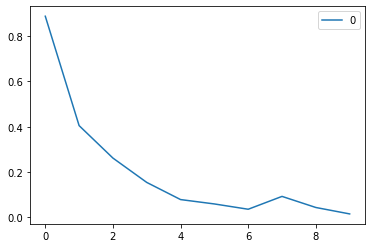

In [ ]:
# Evaluating the Model Performance

loss = pd.DataFrame(model.history.history['loss']).plot()

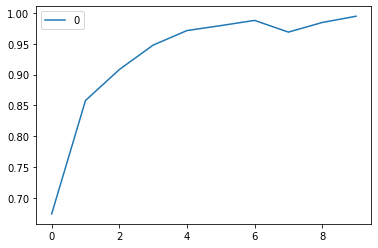

In [ ]:
acc = pd.DataFrame(model.history.history['accuracy']).plot()

In [ ]:
# Prediction on test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 2, 1, ..., 2, 4, 4])

In [ ]:
y_test

array([1, 2, 1, ..., 2, 4, 4])

In [ ]:
accuracy_score(y_test,y_pred)

0.7529504327301337

In [ ]:
confusion_matrix(y_test,y_pred)

array([[135,  17,  15,  27,  44],
       [  3, 242,  11,  37,  33],
       [  1,   0, 157,   8,  54],
       [  1,   2,   7, 162,  15],
       [  2,   0,  29,   8, 261]])

In [ ]:
model.save('Flowers_Recognition_Model.hdf5')

**Testing on Unseen Image**

In [ ]:
!wget https://images.all-free-download.com/images/graphicthumb/sunflower_yellow_flowers_215332.jpg -O pic.jpg

--2021-07-22 05:41:05--  https://images.all-free-download.com/images/graphicthumb/sunflower_yellow_flowers_215332.jpg
Resolving images.all-free-download.com (images.all-free-download.com)... 207.182.153.238
Connecting to images.all-free-download.com (images.all-free-download.com)|207.182.153.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92628 (90K) [image/jpeg]
Saving to: ‘pic.jpg’

pic.jpg             100%[===================>]  90.46K  --.-KB/s    in 0.1s    

2021-07-22 05:41:05 (944 KB/s) - ‘pic.jpg’ saved [92628/92628]



(150, 150, 3)


'sunflower'

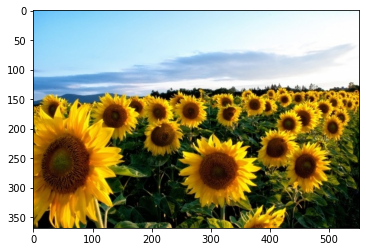

In [ ]:
image = cv2.imread('pic.jpg')
image = cv2.cvtColor(image, cv2.IMREAD_ANYCOLOR)
image_resized = cv2.resize(image,(150,150))
image_resized = image_resized/255
print(image_resized.shape)
plt.imshow(image)
yd = model.predict(image_resized.reshape(-1,150,150,3))
yd = np.argmax(yd,axis=1)
LABEL[yd[0]]